In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from pandas import concat

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\TiTO.tech\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [ ]:
df_DA_US =  df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])



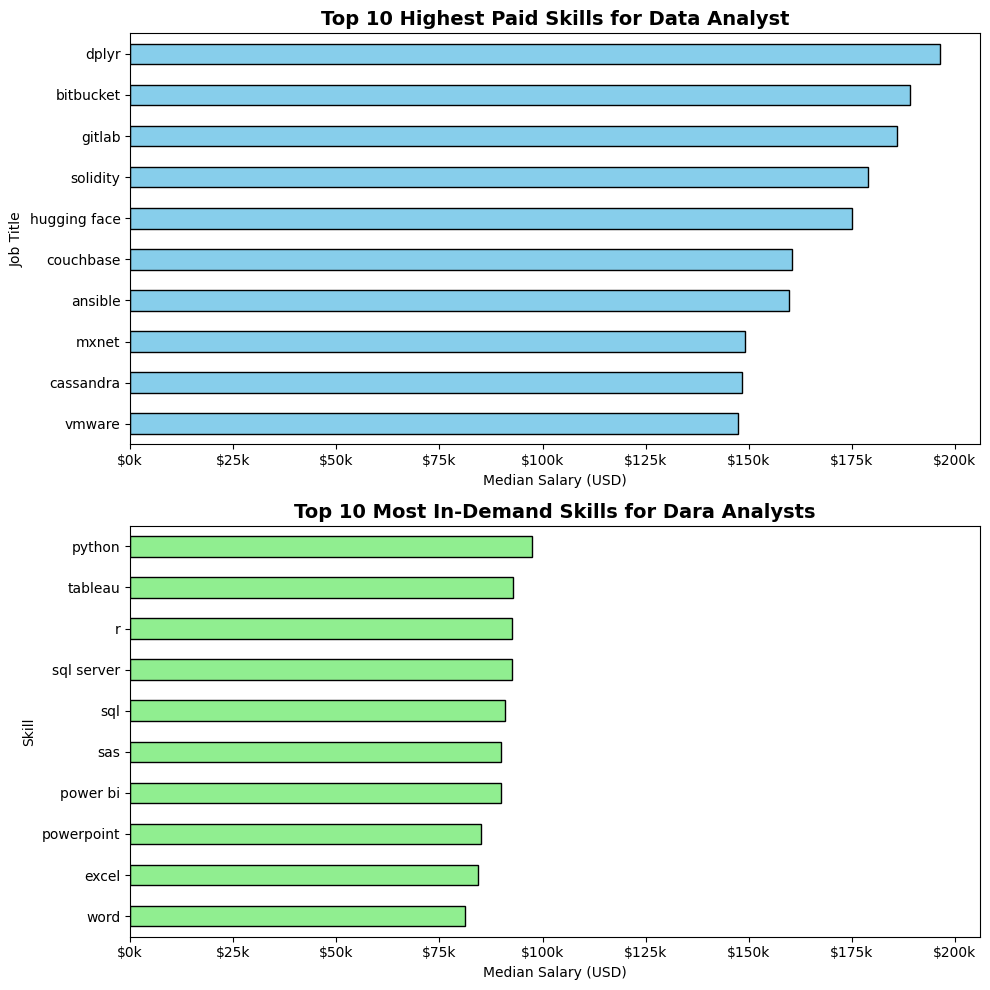

In [12]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# فورمات مخصص: يحول 150000 -> $150k
formatter = FuncFormatter(lambda x, _: f'${int(x/1000)}k')

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# الرسم الأول: أعلى الوظائف
df_DA_top_pay[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[0],
    legend=False,
    color='skyblue',
    edgecolor='black'
)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst" ,  fontsize=14, weight='bold')
ax[0].set_xlabel("Median Salary (USD)")
ax[0].set_ylabel("Job Title")
ax[0].xaxis.set_major_formatter(formatter)  # تطبيق الفورمات

# الرسم الثاني: أعلى المهارات
df_DA_skills[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[1],
    legend=False,
    color='lightgreen',
    edgecolor='black'
)
ax[1].set_title("Top 10 Most In-Demand Skills for Dara Analysts" ,  fontsize=14, weight='bold')
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("Skill")
ax[1].xaxis.set_major_formatter(formatter)  # تطبيق الفورمات

# توحيد مقياس x
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

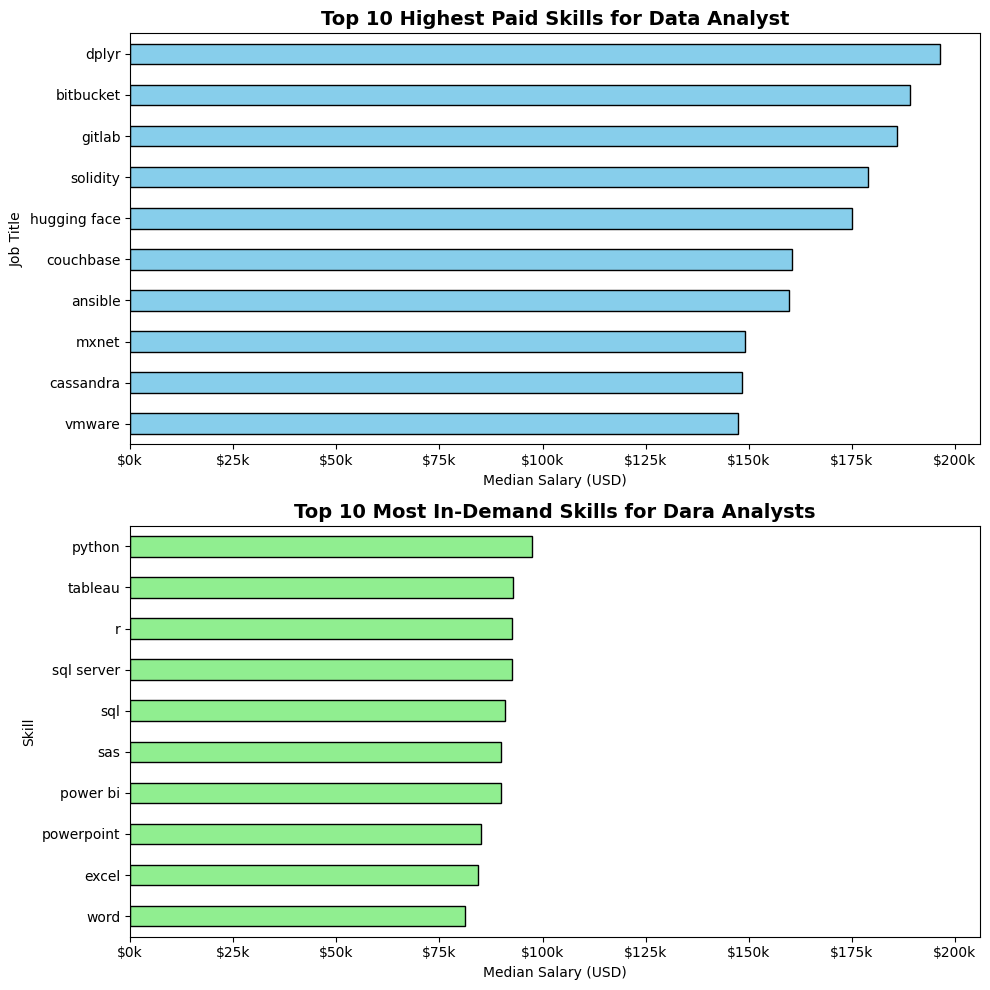

In [7]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# فورمات مخصص: يحول 150000 -> $150k
formatter = FuncFormatter(lambda x, _: f'${int(x/1000)}k')

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# الرسم الأول: أعلى الوظائف
df_DA_top_pay[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[0],
    legend=False,
    color='skyblue',
    edgecolor='black'
)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst" ,  fontsize=14, weight='bold')
ax[0].set_xlabel("Median Salary (USD)")
ax[0].set_ylabel("Job Title")
ax[0].xaxis.set_major_formatter(formatter)  # تطبيق الفورمات

# الرسم الثاني: أعلى المهارات
df_DA_skills[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[1],
    legend=False,
    color='lightgreen',
    edgecolor='black'
)
ax[1].set_title("Top 10 Most In-Demand Skills for Dara Analysts" ,  fontsize=14, weight='bold')
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("Skill")
ax[1].xaxis.set_major_formatter(formatter)  # تطبيق الفورمات

# توحيد مقياس x
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()



<Axes: ylabel='job_skills'>

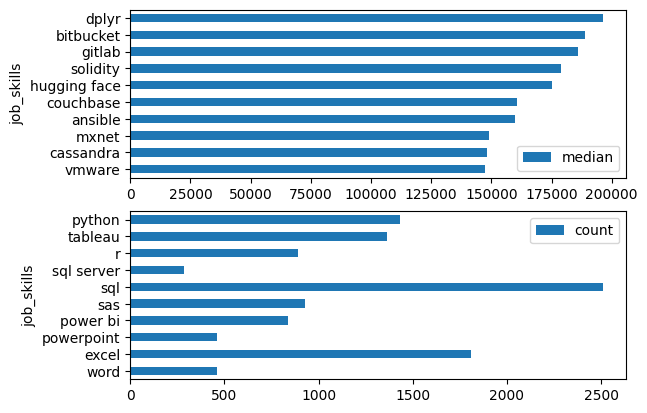

In [8]:

fig,ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])

df_DA_skills[::-1].plot(kind='barh',y='count',ax=ax[1])

(0.0, 206062.5)

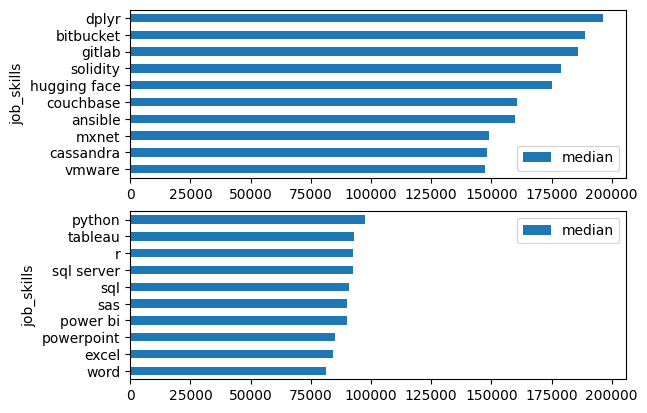

In [9]:

fig,ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])

df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())



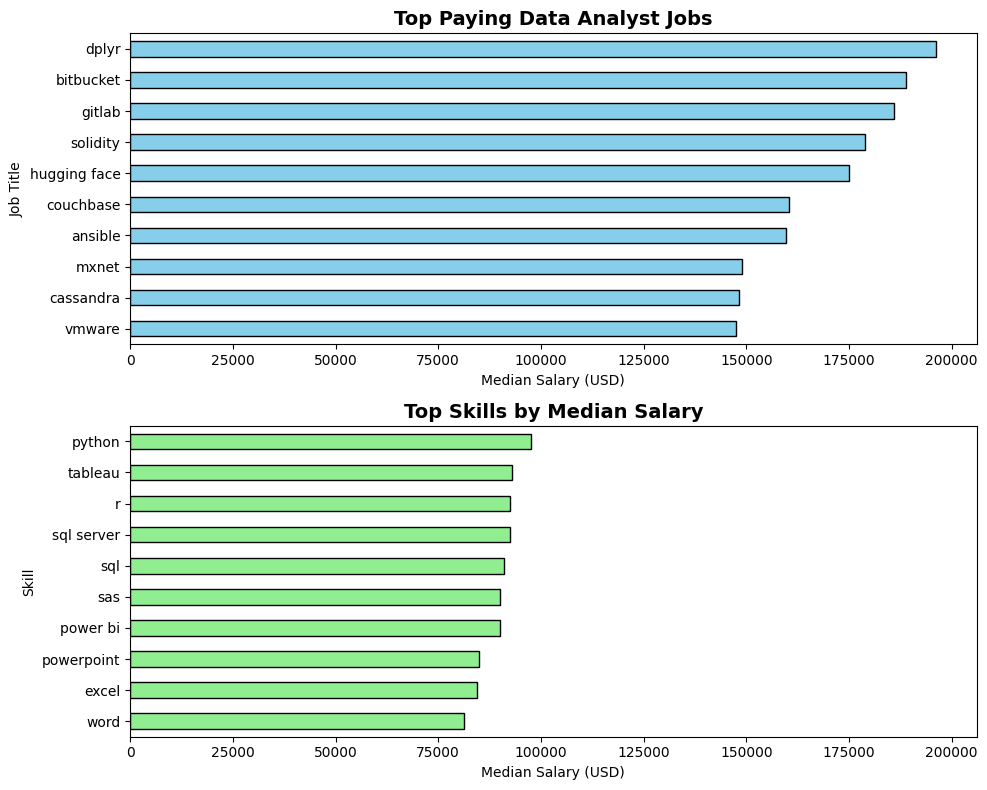

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # حجم مناسب للرسم

# الرسم الأول: أعلى الوظائف من حيث median salary
df_DA_top_pay[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[0],
    legend=False,
    color='skyblue',
    edgecolor='black'
)
ax[0].set_title("Top Paying Data Analyst Jobs", fontsize=14, weight='bold')
ax[0].set_xlabel("Median Salary (USD)")
ax[0].set_ylabel("Job Title")

# الرسم الثاني: المهارات المرتبطة بالرواتب
df_DA_skills[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[1],
    legend=False,
    color='lightgreen',
    edgecolor='black'
)
ax[1].set_title("Top Skills by Median Salary", fontsize=14, weight='bold')
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("Skill")

# توحيد مقياس الـ x بين الرسومتين
ax[1].set_xlim(ax[0].get_xlim())

# تحسين المسافات
plt.tight_layout()
plt.show()


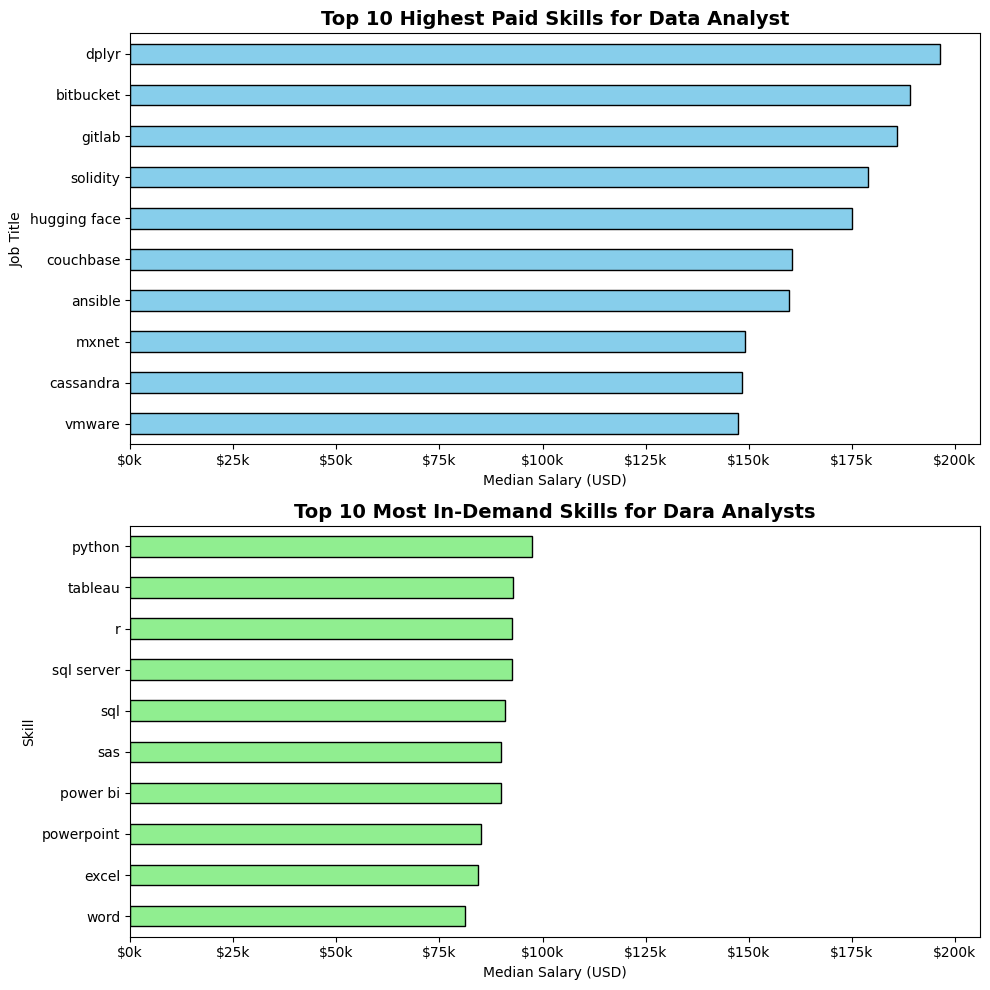

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# فورمات مخصص: يحول 150000 -> $150k
formatter = FuncFormatter(lambda x, _: f'${int(x/1000)}k')

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# الرسم الأول: أعلى الوظائف
df_DA_top_pay[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[0],
    legend=False,
    color='skyblue',
    edgecolor='black'
)
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst" ,  fontsize=14, weight='bold')
ax[0].set_xlabel("Median Salary (USD)")
ax[0].set_ylabel("Job Title")
ax[0].xaxis.set_major_formatter(formatter)  # تطبيق الفورمات

# الرسم الثاني: أعلى المهارات
df_DA_skills[::-1].plot(
    kind='barh',
    y='median',
    ax=ax[1],
    legend=False,
    color='lightgreen',
    edgecolor='black'
)
ax[1].set_title("Top 10 Most In-Demand Skills for Dara Analysts" ,  fontsize=14, weight='bold')
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("Skill")
ax[1].xaxis.set_major_formatter(formatter)  # تطبيق الفورمات

# توحيد مقياس x
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()
